<a href="https://colab.research.google.com/github/PraneetVR/IIITDMJ-DL-Summer-School-Program-Assignments/blob/main/Week_2_Day_1_Representation_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧠 Representation Learning  with Autoencoders

This notebook is part of the **1st Summer School on Deep Learning: Shaping the Future of AI** and demonstrates how unsupervised deep learning can be used to learn **meaningful latent representations**  using **Autoencoders**.

👨‍🏫 **Instructor**: Dr. Jignesh S. Bhatt- IIIT Vadodara   
 📝 **Prepared by**: Vikas Vaghasiya - M.Tech Student, IIIT Vadodara  
📅 **Date**: May 30, 2025  
🕑 **Time**: 2:30 PM – 4:30 PM IST  

---

## 📌 Objectives
- To Understand the concept of representation learning
- To Implement a basic autoencoder architecture
- To Train on image data (MNIST or CIFAR-10)
- To Visualize compressed (latent) features
- To Perform image reconstruction



In [ ]:
!pip install torch torchvision scikit-learn numpy matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 70.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 36.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 101.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

# 🧠 Convolutional Autoencoder on MNIST with t-SNE Visualization

This Colab notebook implements a **Convolutional Autoencoder (CAE)** using PyTorch to compress and reconstruct handwritten digit images from the MNIST dataset. The trained model is evaluated by:

- Reconstructing sample images and comparing them with the originals.
- Visualizing the **latent space** using **t-SNE** to understand feature representations.
- Analyzing original and reconstructed image distributions in 2D space.

The model is trained end-to-end and visual outputs illustrate its learning performance.


Training improved convolutional autoencoder...
Epoch 1/30, Loss: 0.0447
Epoch 2/30, Loss: 0.0112
Epoch 3/30, Loss: 0.0082
Epoch 4/30, Loss: 0.0070
Epoch 5/30, Loss: 0.0063
Epoch 6/30, Loss: 0.0059
Epoch 7/30, Loss: 0.0057
Epoch 8/30, Loss: 0.0054
Epoch 9/30, Loss: 0.0052
Epoch 10/30, Loss: 0.0051
Epoch 11/30, Loss: 0.0050
Epoch 12/30, Loss: 0.0049
Epoch 13/30, Loss: 0.0048
Epoch 14/30, Loss: 0.0047
Epoch 15/30, Loss: 0.0046
Epoch 16/30, Loss: 0.0045
Epoch 17/30, Loss: 0.0045
Epoch 18/30, Loss: 0.0044
Epoch 19/30, Loss: 0.0043
Epoch 20/30, Loss: 0.0043
Epoch 21/30, Loss: 0.0043
Epoch 22/30, Loss: 0.0042
Epoch 23/30, Loss: 0.0042
Epoch 24/30, Loss: 0.0041
Epoch 25/30, Loss: 0.0041
Epoch 26/30, Loss: 0.0040
Epoch 27/30, Loss: 0.0040
Epoch 28/30, Loss: 0.0040
Epoch 29/30, Loss: 0.0040
Epoch 30/30, Loss: 0.0039
Generating visualizations...


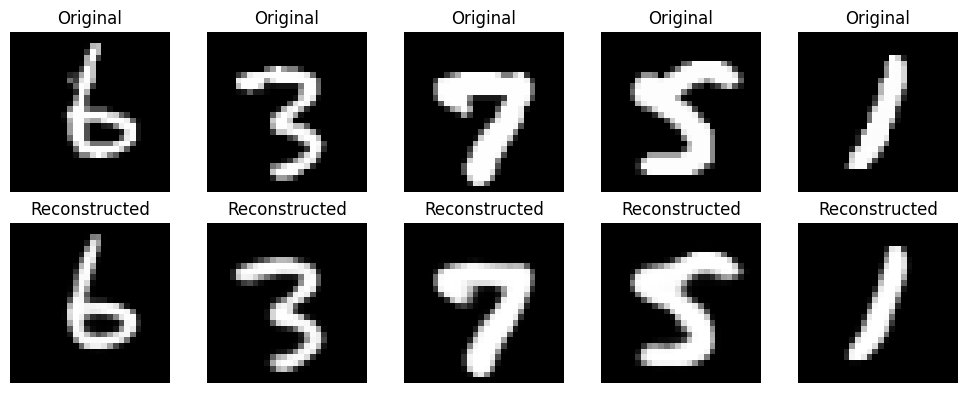

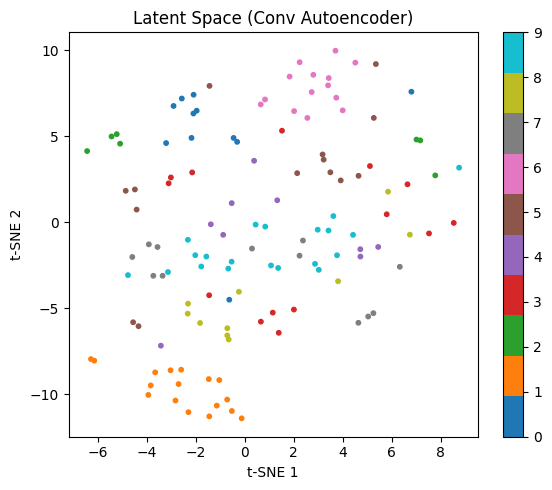

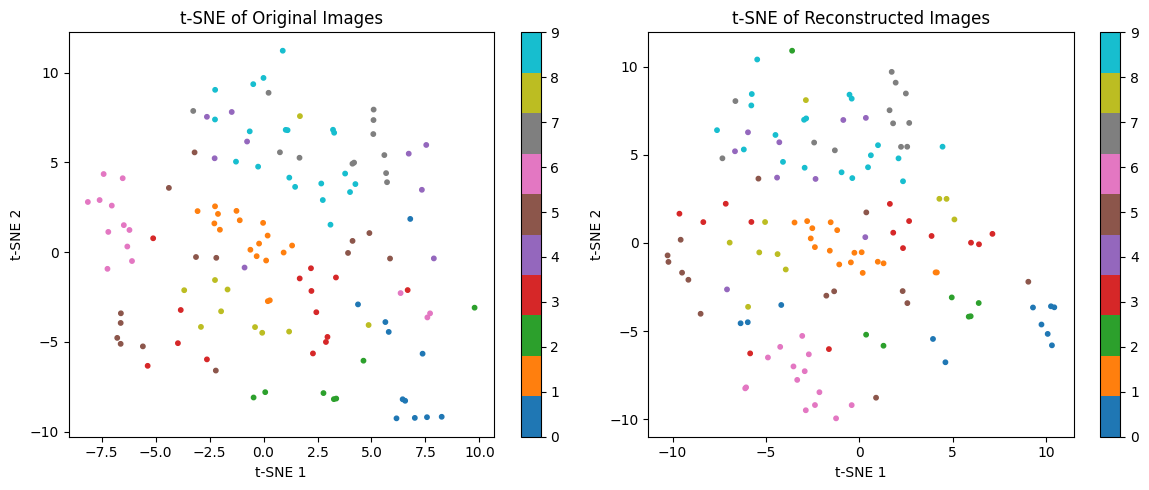

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyperparameters
latent_dim = 64  # Latent space dimension
batch_size = 128
epochs = 30
learning_rate = 0.0005

# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor()])  # Normalize to [0,1] for sigmoid output
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

# Define Convolutional Autoencoder
class ConvAutoencoder(nn.Module):
    def __init__(self, latent_dim=64):
        super(ConvAutoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),  # [batch, 32, 28, 28]
            nn.ReLU(),
            nn.MaxPool2d(2, 2),  # [batch, 32, 14, 14]
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),  # [batch, 64, 14, 14]
            nn.ReLU(),
            nn.MaxPool2d(2, 2),  # [batch, 64, 7, 7]
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),  # [batch, 128, 7, 7]
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Flatten(),
            nn.Linear(128 * 7 * 7, latent_dim),  # [batch, latent_dim]
            nn.ReLU()
        )
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 128 * 7 * 7),
            nn.ReLU(),
            nn.Unflatten(1, (128, 7, 7)),  # [batch, 128, 7, 7]
            nn.ConvTranspose2d(128, 64, kernel_size=3, stride=2, padding=1, output_padding=1),  # [batch, 64, 14, 14]
            nn.ReLU(),
            nn.ConvTranspose2d(64, 32, kernel_size=3, stride=2, padding=1, output_padding=1),  # [batch, 32, 28, 28]
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.ConvTranspose2d(32, 1, kernel_size=3, stride=1, padding=1),  # [batch, 1, 28, 28]
            nn.Sigmoid()
        )

    def forward(self, x):
        z = self.encoder(x)
        x_reconstructed = self.decoder(z)
        return x_reconstructed, z

# Training function
def train_autoencoder(model, train_loader, epochs):
    model.train()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    criterion = nn.MSELoss()
    for epoch in range(epochs):
        total_loss = 0
        for batch, _ in train_loader:
            batch = batch.to(device)
            optimizer.zero_grad()
            output, _ = model(batch)
            loss = criterion(output, batch)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f'Epoch {epoch+1}/{epochs}, Loss: {total_loss/len(train_loader):.4f}')

# Visualization function
def visualize_results(model, data_loader, device):
    model.eval()
    images, labels = next(iter(data_loader))
    images = images.to(device)
    with torch.no_grad():
        reconstructed, z = model(images)
        z_np = z.cpu().numpy()
        reconstructed_np = reconstructed.cpu().numpy()
        original_np = images.cpu().numpy()

    # Plot original vs reconstructed images
    plt.figure(figsize=(10, 4))
    for i in range(5):
        # Original
        plt.subplot(2, 5, i+1)
        plt.imshow(original_np[i].reshape(28, 28), cmap='gray')
        plt.title('Original')
        plt.axis('off')
        # Reconstructed
        plt.subplot(2, 5, i+6)
        plt.imshow(reconstructed_np[i].reshape(28, 28), cmap='gray')
        plt.title('Reconstructed')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

    # t-SNE visualization of latent space
    tsne = TSNE(n_components=2, random_state=42)
    z_tsne = tsne.fit_transform(z_np)

    plt.figure(figsize=(6, 5))
    scatter = plt.scatter(z_tsne[:, 0], z_tsne[:, 1], c=labels.numpy(), cmap='tab10', s=10)
    plt.colorbar(scatter)
    plt.title('Latent Space (Conv Autoencoder)')
    plt.xlabel('t-SNE 1')
    plt.ylabel('t-SNE 2')
    plt.tight_layout()
    plt.show()

    # t-SNE visualization of original and reconstructed images
    # Flatten images for t-SNE
    original_flat = original_np.reshape(len(original_np), -1)  # [batch, 784]
    reconstructed_flat = reconstructed_np.reshape(len(reconstructed_np), -1)  # [batch, 784]

    # Compute t-SNE for original images
    tsne_original = TSNE(n_components=2, random_state=42)
    original_tsne = tsne_original.fit_transform(original_flat)

    # Compute t-SNE for reconstructed images
    tsne_reconstructed = TSNE(n_components=2, random_state=42)
    reconstructed_tsne = tsne_reconstructed.fit_transform(reconstructed_flat)

    # Plot t-SNE for original and reconstructed
    plt.figure(figsize=(12, 5))
    # Original t-SNE
    plt.subplot(1, 2, 1)
    scatter = plt.scatter(original_tsne[:, 0], original_tsne[:, 1], c=labels.numpy(), cmap='tab10', s=10)
    plt.colorbar(scatter)
    plt.title('t-SNE of Original Images')
    plt.xlabel('t-SNE 1')
    plt.ylabel('t-SNE 2')
    # Reconstructed t-SNE
    plt.subplot(1, 2, 2)
    scatter = plt.scatter(reconstructed_tsne[:, 0], reconstructed_tsne[:, 1], c=labels.numpy(), cmap='tab10', s=10)
    plt.colorbar(scatter)
    plt.title('t-SNE of Reconstructed Images')
    plt.xlabel('t-SNE 1')
    plt.ylabel('t-SNE 2')
    plt.tight_layout()
    plt.show()

# Main execution
if __name__ == '__main__':
    # Initialize model
    model = ConvAutoencoder(latent_dim).to(device)

    # Train autoencoder
    print("Training improved convolutional autoencoder...")
    train_autoencoder(model, train_loader, epochs)

    # Visualize results
    print("Generating visualizations...")
    visualize_results(model, train_loader, device)

# 🧠 Kernel PCA Compression & Reconstruction of MNIST with t-SNE Visualization

This notebook demonstrates **unsupervised compression** of MNIST images using **Kernel PCA (Polynomial Kernel)** followed by **Linear Regression** for reconstruction. It also includes:

- Subsampling of the MNIST dataset for efficient processing.
- Visualization of original vs. reconstructed images.
- **t-SNE plots** of:
  - Compressed latent space
  - Original images
  - Reconstructed images

The notebook provides an intuitive look at how nonlinear compression and linear reconstruction affect image representation and clustering.


Preparing data for Kernel PCA (subset of 5,000 images)...
Applying Kernel PCA with polynomial kernel and linear regression...
Generating visualizations...


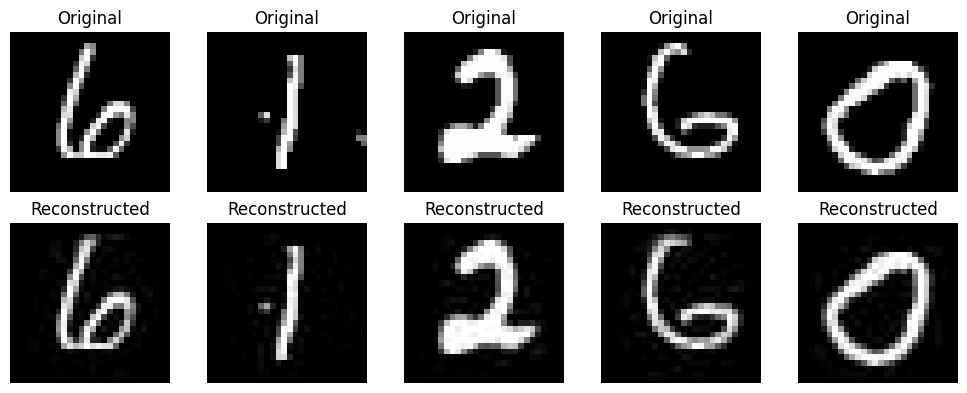

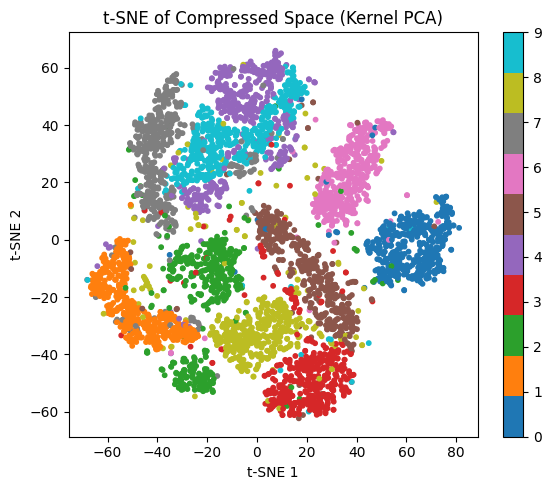

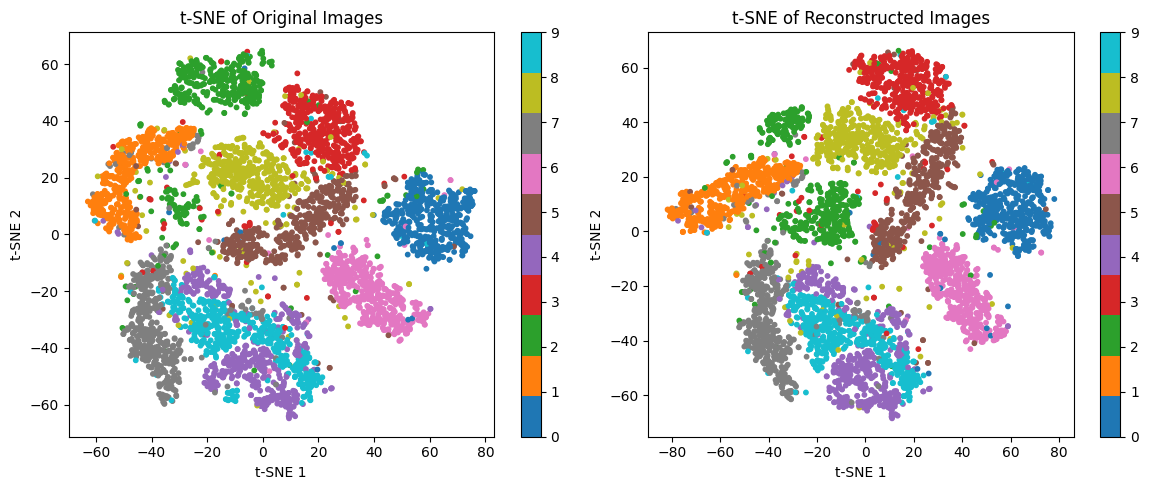

In [ ]:
import torch
from torch.utils.data import DataLoader, Subset
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from sklearn.decomposition import KernelPCA
from sklearn.manifold import TSNE
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Hyperparameters
compressed_dim = 256  # Increased to retain more information
batch_size = 128
subset_size = 5000  # Subset size to manage RAM usage

# Load MNIST dataset and create a subset
transform = transforms.Compose([transforms.ToTensor()])  # Normalize to [0,1]
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
# Create a subset of the dataset
indices = np.random.choice(len(train_dataset), subset_size, replace=False)
subset_dataset = Subset(train_dataset, indices)
train_loader = DataLoader(dataset=subset_dataset, batch_size=batch_size, shuffle=True)

# Prepare data for Kernel PCA
def prepare_data(data_loader):
    images_list = []
    labels_list = []
    for images, labels in data_loader:
        images = images.numpy().reshape(len(images), -1)  # Flatten to [batch, 784]
        images_list.append(images)
        labels_list.append(labels.numpy())
    images_flat = np.concatenate(images_list, axis=0)
    labels = np.concatenate(labels_list, axis=0)
    return images_flat, labels

# Apply Kernel PCA and reconstruct with linear regression
def apply_kernel_pca(images_flat, n_components=compressed_dim, kernel='poly'):
    # Apply Kernel PCA
    kpca = KernelPCA(n_components=n_components, kernel=kernel, fit_inverse_transform=True)
    compressed = kpca.fit_transform(images_flat)

    # Train a linear regression model to map compressed representations back to original space
    lin_reg = LinearRegression()
    lin_reg.fit(compressed, images_flat)
    reconstructed = lin_reg.predict(compressed)

    # Clip reconstructed values to [0,1] to match input range
    reconstructed = np.clip(reconstructed, 0, 1)

    return compressed, reconstructed, kpca

# Visualization function
def visualize_results(images, labels, compressed, reconstructed, kpca):
    # Plot original vs reconstructed images
    plt.figure(figsize=(10, 4))
    for i in range(5):
        # Original
        plt.subplot(2, 5, i+1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        plt.title('Original')
        plt.axis('off')
        # Reconstructed
        plt.subplot(2, 5, i+6)
        plt.imshow(reconstructed[i].reshape(28, 28), cmap='gray')
        plt.title('Reconstructed')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

    # t-SNE visualization of compressed space
    tsne = TSNE(n_components=2, random_state=42)
    compressed_tsne = tsne.fit_transform(compressed)

    plt.figure(figsize=(6, 5))
    scatter = plt.scatter(compressed_tsne[:, 0], compressed_tsne[:, 1], c=labels, cmap='tab10', s=10)
    plt.colorbar(scatter)
    plt.title('t-SNE of Compressed Space (Kernel PCA)')
    plt.xlabel('t-SNE 1')
    plt.ylabel('t-SNE 2')
    plt.tight_layout()
    plt.show()

    # t-SNE visualization of original and reconstructed images
    tsne_original = TSNE(n_components=2, random_state=42)
    original_tsne = tsne_original.fit_transform(images)

    tsne_reconstructed = TSNE(n_components=2, random_state=42)
    reconstructed_tsne = tsne_reconstructed.fit_transform(reconstructed)

    plt.figure(figsize=(12, 5))
    # Original t-SNE
    plt.subplot(1, 2, 1)
    scatter = plt.scatter(original_tsne[:, 0], original_tsne[:, 1], c=labels, cmap='tab10', s=10)
    plt.colorbar(scatter)
    plt.title('t-SNE of Original Images')
    plt.xlabel('t-SNE 1')
    plt.ylabel('t-SNE 2')
    # Reconstructed t-SNE
    plt.subplot(1, 2, 2)
    scatter = plt.scatter(reconstructed_tsne[:, 0], reconstructed_tsne[:, 1], c=labels, cmap='tab10', s=10)
    plt.colorbar(scatter)
    plt.title('t-SNE of Reconstructed Images')
    plt.xlabel('t-SNE 1')
    plt.ylabel('t-SNE 2')
    plt.tight_layout()
    plt.show()

# Main execution
if __name__ == '__main__':
    # Prepare data
    print("Preparing data for Kernel PCA (subset of 5,000 images)...")
    images_flat, labels = prepare_data(train_loader)

    # Apply Kernel PCA and reconstruct
    print("Applying Kernel PCA with polynomial kernel and linear regression...")
    compressed, reconstructed, kpca = apply_kernel_pca(images_flat, n_components=compressed_dim)

    # Visualize results
    print("Generating visualizations...")
    visualize_results(images_flat, labels, compressed, reconstructed, kpca)

# 🧠 L2-Normalized Convolutional Autoencoder on MNIST with Custom L1.5 Loss

This notebook demonstrates **unsupervised representation learning** on the MNIST dataset using a **convolutional autoencoder**. Key features include:

- Encoding and decoding of grayscale images using convolutional layers.
- **L2 normalization** of outputs to constrain representations on the unit hypersphere.
- Use of a **non-standard L1.5 loss function** to penalize reconstruction error.
- Visual comparison between original and reconstructed images.
- Lightweight and modular architecture suitable for anomaly detection or contrastive learning.

The notebook provides insight into how normalized feature learning and fractional loss functions influence image reconstruction.


Training autoencoder with L2 loss...
Epoch 1/10, Loss: 0.0309
Epoch 2/10, Loss: 0.0010
Epoch 3/10, Loss: 0.0009
Epoch 4/10, Loss: 0.0008
Epoch 5/10, Loss: 0.0007
Epoch 6/10, Loss: 0.0006
Epoch 7/10, Loss: 0.0005
Epoch 8/10, Loss: 0.0004
Epoch 9/10, Loss: 0.0003
Epoch 10/10, Loss: 0.0003
Training autoencoder with L1.5 loss...
Epoch 1/10, Loss: 0.0106
Epoch 2/10, Loss: 0.0019
Epoch 3/10, Loss: 0.0013
Epoch 4/10, Loss: 0.0011
Epoch 5/10, Loss: 0.0009
Epoch 6/10, Loss: 0.0008
Epoch 7/10, Loss: 0.0008
Epoch 8/10, Loss: 0.0007
Epoch 9/10, Loss: 0.0007
Epoch 10/10, Loss: 0.0006
Generating visualizations...


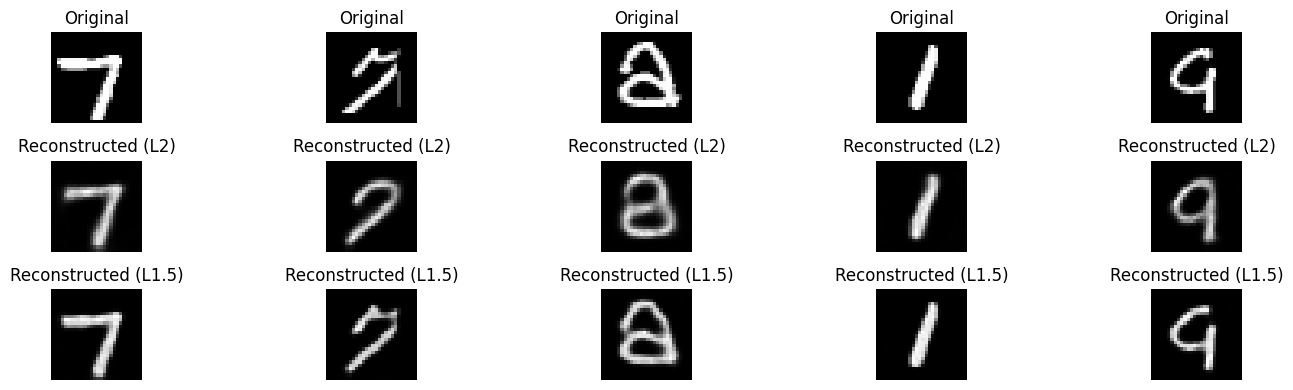

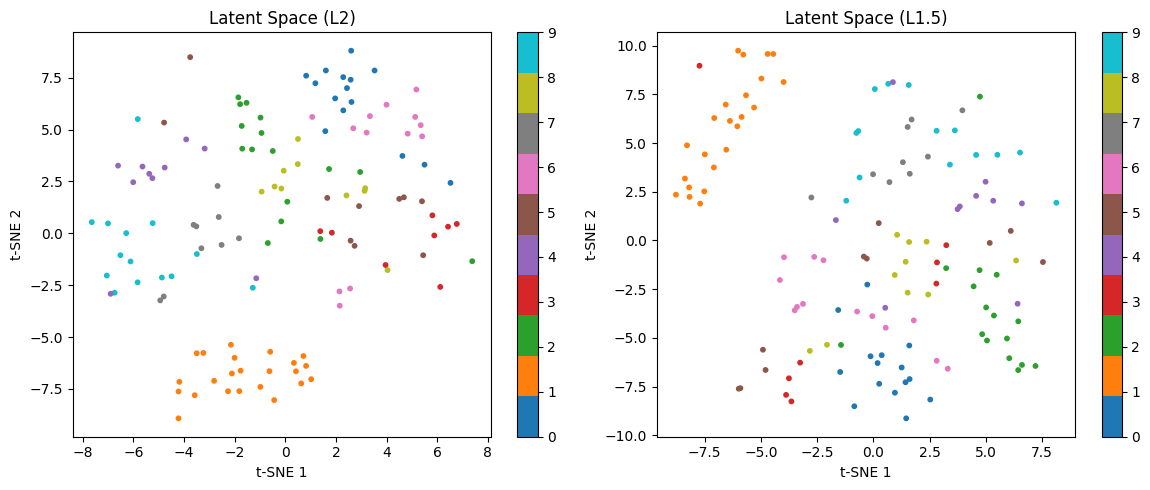

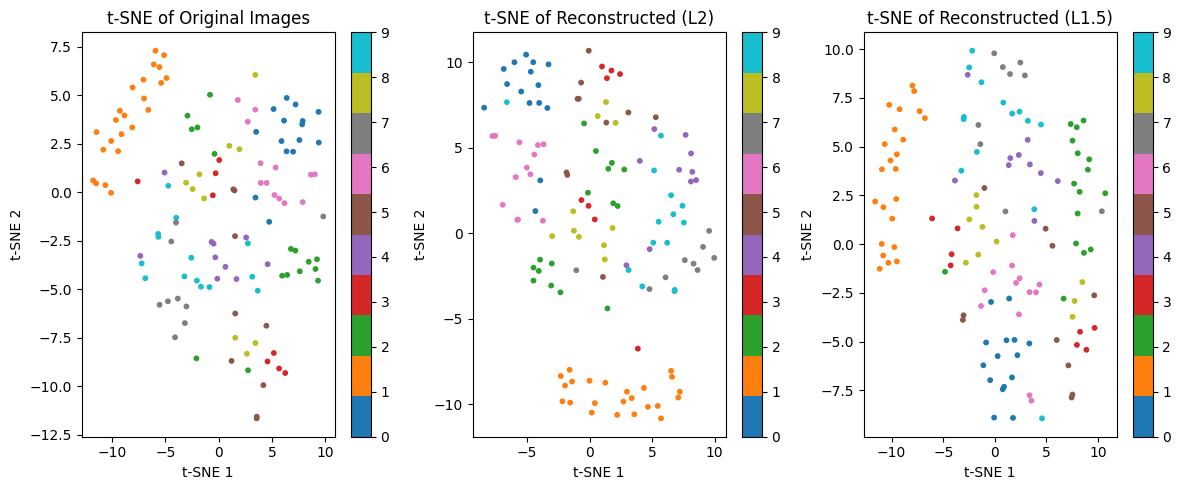

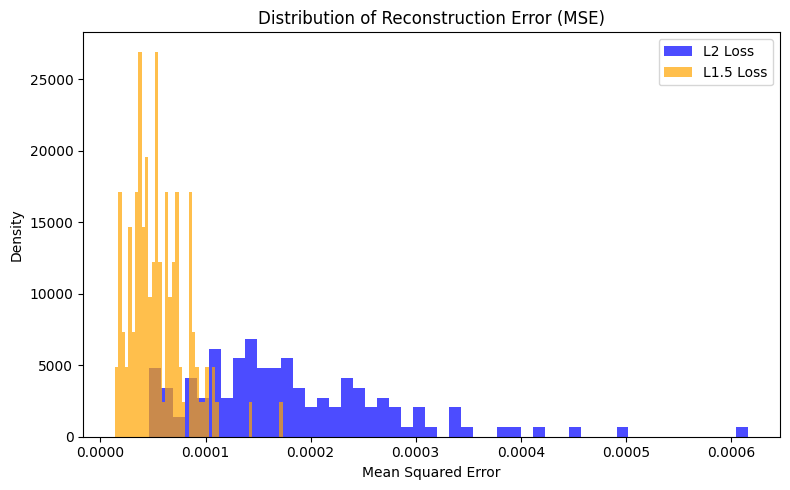

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyperparameters
latent_dim = 128
batch_size = 128
epochs = 10
learning_rate = 0.0005
weight_decay = 1e-5

# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor()])
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

# Define Convolutional Autoencoder
class ConvAutoencoder(nn.Module):
    def __init__(self, latent_dim=128):
        super(ConvAutoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Flatten(),
            nn.Linear(128 * 7 * 7, latent_dim),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 128 * 7 * 7),
            nn.ReLU(),
            nn.Unflatten(1, (128, 7, 7)),
            nn.ConvTranspose2d(128, 64, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.ConvTranspose2d(64, 32, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.ConvTranspose2d(32, 1, kernel_size=3, stride=1, padding=1),
            nn.Sigmoid()
        )

    def forward(self, x):
        z = self.encoder(x)
        x_reconstructed = self.decoder(z)
        return x_reconstructed, z

# L2 normalization for a batch of images
def l2_normalize_images(images):
    images_flat = images.view(images.size(0), -1)
    norms = torch.norm(images_flat, p=2, dim=1, keepdim=True)
    norms = torch.where(norms == 0, torch.ones_like(norms), norms)
    images_normalized = images_flat / norms
    return images_normalized.view_as(images)

# Custom L1.5 norm loss
def l15_loss(output, target):
    return torch.mean(torch.abs(output - target) ** 1.5)

# Training function
def train_autoencoder(model, train_loader, epochs, use_l15=False):
    model.train()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
    criterion = l15_loss if use_l15 else nn.MSELoss()
    for epoch in range(epochs):
        total_loss = 0
        for batch, _ in train_loader:
            batch = batch.to(device)
            batch = l2_normalize_images(batch)
            optimizer.zero_grad()
            output, _ = model(batch)
            loss = criterion(output, batch)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f'Epoch {epoch+1}/{epochs}, Loss: {total_loss/len(train_loader):.4f}')
    return model

# Visualization function
def visualize_results(model_l2, model_l15, data_loader, device):
    model_l2.eval()
    model_l15.eval()
    images, labels = next(iter(data_loader))
    images = images.to(device)
    images_normalized = l2_normalize_images(images)

    with torch.no_grad():
        # L2 model
        reconstructed_l2, z_l2 = model_l2(images_normalized)
        z_l2_np = z_l2.cpu().numpy()
        reconstructed_l2_np = reconstructed_l2.cpu().numpy()
        # L1.5 model
        reconstructed_l15, z_l15 = model_l15(images_normalized)
        z_l15_np = z_l15.cpu().numpy()
        reconstructed_l15_np = reconstructed_l15.cpu().numpy()
        # Original
        original_np = images_normalized.cpu().numpy()

    # Plot original vs reconstructed images for both models
    plt.figure(figsize=(15, 4))
    for i in range(5):
        # Original
        plt.subplot(3, 5, i+1)
        plt.imshow(original_np[i].reshape(28, 28), cmap='gray')
        plt.title('Original')
        plt.axis('off')
        # Reconstructed (L2)
        plt.subplot(3, 5, i+6)
        plt.imshow(reconstructed_l2_np[i].reshape(28, 28), cmap='gray')
        plt.title('Reconstructed (L2)')
        plt.axis('off')
        # Reconstructed (L1.5)
        plt.subplot(3, 5, i+11)
        plt.imshow(reconstructed_l15_np[i].reshape(28, 28), cmap='gray')
        plt.title('Reconstructed (L1.5)')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

    # t-SNE visualization of latent space for both models
    tsne = TSNE(n_components=2, random_state=42)
    z_l2_tsne = tsne.fit_transform(z_l2_np)
    z_l15_tsne = tsne.fit_transform(z_l15_np)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    scatter = plt.scatter(z_l2_tsne[:, 0], z_l2_tsne[:, 1], c=labels.numpy(), cmap='tab10', s=10)
    plt.colorbar(scatter)
    plt.title('Latent Space (L2)')
    plt.xlabel('t-SNE 1')
    plt.ylabel('t-SNE 2')
    plt.subplot(1, 2, 2)
    scatter = plt.scatter(z_l15_tsne[:, 0], z_l15_tsne[:, 1], c=labels.numpy(), cmap='tab10', s=10)
    plt.colorbar(scatter)
    plt.title('Latent Space (L1.5)')
    plt.xlabel('t-SNE 1')
    plt.ylabel('t-SNE 2')
    plt.tight_layout()
    plt.show()

    # t-SNE visualization of original and reconstructed images for both models
    original_flat = original_np.reshape(len(original_np), -1)
    reconstructed_l2_flat = reconstructed_l2_np.reshape(len(reconstructed_l2_np), -1)
    reconstructed_l15_flat = reconstructed_l15_np.reshape(len(reconstructed_l15_np), -1)

    tsne_original = TSNE(n_components=2, random_state=42)
    original_tsne = tsne_original.fit_transform(original_flat)
    tsne_reconstructed_l2 = TSNE(n_components=2, random_state=42)
    reconstructed_l2_tsne = tsne_reconstructed_l2.fit_transform(reconstructed_l2_flat)
    tsne_reconstructed_l15 = TSNE(n_components=2, random_state=42)
    reconstructed_l15_tsne = tsne_reconstructed_l15.fit_transform(reconstructed_l15_flat)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 3, 1)
    scatter = plt.scatter(original_tsne[:, 0], original_tsne[:, 1], c=labels.numpy(), cmap='tab10', s=10)
    plt.colorbar(scatter)
    plt.title('t-SNE of Original Images')
    plt.xlabel('t-SNE 1')
    plt.ylabel('t-SNE 2')
    plt.subplot(1, 3, 2)
    scatter = plt.scatter(reconstructed_l2_tsne[:, 0], reconstructed_l2_tsne[:, 1], c=labels.numpy(), cmap='tab10', s=10)
    plt.colorbar(scatter)
    plt.title('t-SNE of Reconstructed (L2)')
    plt.xlabel('t-SNE 1')
    plt.ylabel('t-SNE 2')
    plt.subplot(1, 3, 3)
    scatter = plt.scatter(reconstructed_l15_tsne[:, 0], reconstructed_l15_tsne[:, 1], c=labels.numpy(), cmap='tab10', s=10)
    plt.colorbar(scatter)
    plt.title('t-SNE of Reconstructed (L1.5)')
    plt.xlabel('t-SNE 1')
    plt.ylabel('t-SNE 2')
    plt.tight_layout()
    plt.show()

    # Plot reconstruction error (MSE) distribution for both models
    mse_l2 = np.mean((original_np - reconstructed_l2_np) ** 2, axis=(1, 2, 3))
    mse_l15 = np.mean((original_np - reconstructed_l15_np) ** 2, axis=(1, 2, 3))
    plt.figure(figsize=(8, 5))
    plt.hist(mse_l2, bins=50, color='blue', alpha=0.7, label='L2 Loss', density=True)
    plt.hist(mse_l15, bins=50, color='orange', alpha=0.7, label='L1.5 Loss', density=True)
    plt.title('Distribution of Reconstruction Error (MSE)')
    plt.xlabel('Mean Squared Error')
    plt.ylabel('Density')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Main execution
if __name__ == '__main__':
    # Initialize two models
    model_l2 = ConvAutoencoder(latent_dim).to(device)
    model_l15 = ConvAutoencoder(latent_dim).to(device)

    # Train with L2 loss
    print("Training autoencoder with L2 loss...")
    model_l2 = train_autoencoder(model_l2, train_loader, epochs, use_l15=False)

    # Train with L1.5 loss
    print("Training autoencoder with L1.5 loss...")
    model_l15 = train_autoencoder(model_l15, train_loader, epochs, use_l15=True)

    # Visualize results
    print("Generating visualizations...")
    visualize_results(model_l2, model_l15, train_loader, device)